In [1]:
# path


In [2]:
import os, sys
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import cloudpickle

def save_as_pkl( obj, fpath ):
    fwb = open( fpath, 'wb')
    tmp = fwb.write(cloudpickle.dumps(obj))
    return

In [4]:
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
import numpy as np

model = InceptionV3(weights='imagenet', include_top=True)
# model.summary()

def incV3_2048_feature( img_path ):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    model_extractfeatures = Model(inputs=model.input, outputs=model.get_layer('avg_pool').output)
    fc2_features = model_extractfeatures.predict(x)
    return fc2_features

ModuleNotFoundError: No module named 'keras'

In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

model = VGG16(weights='imagenet', include_top=True)
# model.summary()

def vgg_fc1_feature( img_path ):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    model_extractfeatures = Model(inputs=model.input, outputs=model.get_layer('fc1').output)
    fc1_features = model_extractfeatures.predict(x)
    return fc1_features

def vgg_fc2_feature( img_path ):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    model_extractfeatures = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
    fc2_features = model_extractfeatures.predict(x)
    return fc2_features

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
feature = vgg_fc2_feature( 'test.jpg' )
# feature = incV3_2048_feature( 'test.jpg' )
feature

In [ ]:
 # read csv

df = pd.read_csv( '../../data/keyakizaka46_blog.csv' )
print(df.shape)
df.head()

In [ ]:
# save vgg features

save_dir = '../../data/images'

dirs = os.listdir( save_dir )
for author in dirs:
    if os.path.exists( '../../feature/image/vgg_fc2/X_vgg_fc2_%s.pkl' % (author) ): continue
    print( author, "Extract features..." )
    X = []
    y = []
    image_list  = []
    images = os.listdir( '%s/%s'% (save_dir,author) )
    for idx, imname in enumerate( images ):
        if idx % 100 == 0: print( idx )
        img_path = '%s/%s/%s'% (save_dir,author,imname)
        feature = vgg_fc2_feature(img_path)
        X.append( feature.flatten() )
        y.append( author )
        image_list.append( img_path )
    
    # save feature
    print( author, "Save features..." )
    X = np.array(X)
    save_as_pkl( X, '../../feature/image/vgg_fc2/X_vgg_fc2_%s.pkl' % (author) )
    save_as_pkl( y, '../../feature/image/vgg_fc2/y_vgg_fc2_%s.pkl' % (author) )
    save_as_pkl( image_list, '../../feature/image/vgg_fc2/imagelist_vgg_fc2_%s.pkl' % (author) )

In [4]:
def vgg_fc1_feature( img_path ):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    model_extractfeatures = Model(inputs=model.input, outputs=model.get_layer('fc1').output)
    fc1_features = model_extractfeatures.predict(x)
    return fc1_features

def vgg_fc2_feature( img_path ):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    model_extractfeatures = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
    fc2_features = model_extractfeatures.predict(x)
    return fc2_features

def incV3_2048_feature( img_path ):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    model_extractfeatures = Model(inputs=model.input, outputs=model.get_layer('avg_pool').output)
    fc2_features = model_extractfeatures.predict(x)
    return fc2_features

feature = vgg_fc2_feature( 'test.jpg' )
# feature = incV3_2048_feature( 'test.jpg' )
feature

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.70950484]], dtype=float32)

In [5]:
 # read csv

df = pd.read_csv( '../../data/keyakizaka46_blog.csv' )
print(df.shape)
df.head()

(16283, 5)


,author,datetime,title,text,images
0,織田奈那,2015/11/1322:21,ドキドキ,\r\n皆さんこんちには今日からブログがスタートします♡とうとう明日はお見立て会です皆さんに...,http://cdn.keyakizaka46.com/files/14/diary/k46...
1,長沢菜々香,2015/11/1322:14,長沢菜々香です^^*,\r\nついに❗❗明日からお見立て会ですね(o^^o)✨今日の夕方頃、⊿乃木神社⊿に行って、...,http://cdn.keyakizaka46.com/files/14/diary/k46...
2,守屋茜,2015/11/1322:06,祝✧初投稿。!!!!,\r\nみなさまはじめまして。守屋茜です。ご覧頂きありがとうございますヾ(*･ω･*)ﾉ い...,http://cdn.keyakizaka46.com/files/14/diary/k46...
3,菅井友香,2015/11/1501:06,ハラハラドキドキの1日でした!,\r\nこんばんはっ★本日は、待ちに待ったお見立て会1日目でした!お足元の悪い中、まだまだ未...,http://cdn.keyakizaka46.com/files/14/diary/k46...
4,尾関梨香,2015/11/1501:03,初!お見立て会②,\r\nこんばんは☆彡尾関梨香です(^ν^)本日14日(土) Zepp DiverCity ...,http://cdn.keyakizaka46.com/files/14/diary/k46...


In [ ]:
save_dir = '../../data/images'

X = []
y = []
image_list  = []
dirs = os.listdir( save_dir )
for author in dirs:
    print( author )
    images = os.listdir( '%s/%s'% (save_dir,author) )
    for imname in images:
        img_path = '%s/%s/%s'% (save_dir,author,imname)
        feature = vgg_fc2_feature(img_path)
        X.append( feature.flatten() )
        y.append( author )
        image_list.append( img_path )

原田葵
尾関梨香
織田奈那
影山優佳
渡邉理佐
高瀬愛奈
佐々木美玲
富田鈴花
渡邉美穂
石森虹花
守屋茜
上村莉菜
濱岸ひより
潮紗理菜
土生瑞穂
河田陽菜
小池美波
宮田愛萌
井口眞緒
長濱ねる
高本彩花
小坂菜緒
渡辺梨加
齋藤冬優花
佐藤詩織
菅井友香
松田好花
平手友梨奈
小林由依
長沢菜々香
加藤史帆
金村美玖
鈴本美愉
柿崎芽実
齊藤京子


In [7]:
X = np.array(X)
X.shape

(1900, 4096)

In [8]:
# pca
from sklearn.decomposition import PCA

pca = PCA(); pca.fit(X)
Xr = pca.fit_transform( X )

In [12]:
from annoy import AnnoyIndex
import random

In [13]:
f = 100
t = AnnoyIndex(f)
for i in range( X.shape[0] ):
    t.add_item(i, Xr[:,:f][i])

In [14]:
t.build(10)
t.save('test.ann')

True

In [15]:
u = AnnoyIndex(f)
u.load('test.ann') # モデルを読み込むことも可能です。

True

111 ../data/images/織田奈那/mobq2CU5B.jpg 0.00020445323025342077


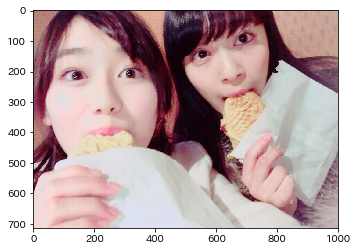

613 ../data/images/濱岸ひより/3b99e9206276e8f60494afdf0b03f.jpg 0.842311680316925


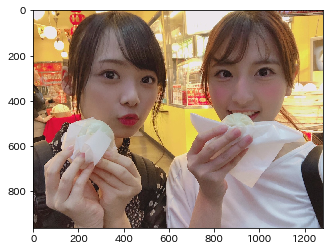

1487 ../data/images/長沢菜々香/mobWtwpoy.jpg 0.8472457528114319


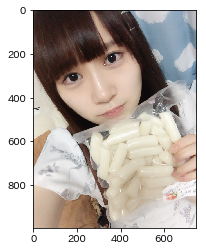

1862 ../data/images/丹生明里/mobLiYsYS.jpg 0.9537407159805298


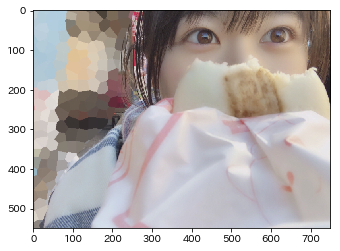

1724 ../data/images/齊藤京子/mobREIt2a.jpg 0.9993398785591125


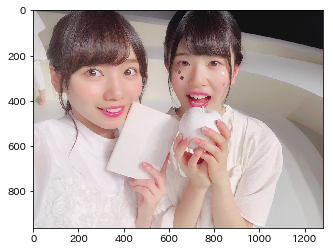

In [52]:
target = 111
k = 5
images, dists = u.get_nns_by_item(target, k, include_distances=True) # search_k=-1
for i in range( k ): # search_k=-1
    print( images[i], image_list[images[i]], dists[i] )
    im = Image.open(image_list[images[i]])
    im_list = np.asarray(im)
    plt.imshow(im_list)
    plt.show()

In [46]:
# from sklearn.manifold import TSNE
# X_tsne = TSNE(n_components=2, perplexity=10, random_state=0).fit_transform( Xr[:,:100] )

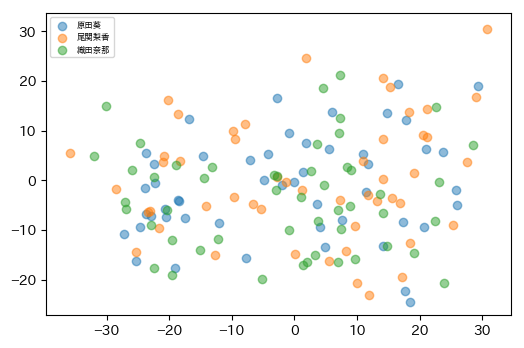

In [49]:
def plot( X_tmp, y_tmp, d1, d2 ): # , groups
    fig = plt.figure(figsize=(6,4),dpi=100)
    groups = { l:[] for l in np.unique( np.array(y_tmp) )}
    for i, l in enumerate( y_tmp ):
        groups[l].append( i )
    for l, g in groups.items():
        # if not l in ['原田葵','尾関梨香','織田奈那']: continue
        plt.scatter(X_tmp[g, d1], X_tmp[g, d2], alpha=0.5, label=l)
    plt.legend(loc = 'best', prop={'size': 6})
    plt.show()

def plot_with_label( X_tmp, y_tmp, groups, g_size_dic, d1, d2 ): # , groups
    fig = plt.figure(figsize=(6,4),dpi=200)
    for i in range( len( groups ) ):
        plt.scatter(X_tmp[groups[i], d1], X_tmp[groups[i], d2], alpha=0.5, s=g_size_dic[i], label='cluster-%d' % i)

    for i, cat in enumerate( y_tmp ):
        plt.annotate( s=cat, xy=(X_tmp[i, d1],X_tmp[i, d2]), ha='right', va='bottom',
            bbox=dict(boxstyle='round, pad=0.05', fc='orange', alpha=0.6),fontsize=4,
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    plt.legend(loc = 'best', prop={'size': 5})
    plt.show()

plot( Xr[:,:2], y, 0, 1 )